In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [79]:
control_data = np.genfromtxt('data/control.csv', delimiter=',')
alcohol_data = np.genfromtxt('data/alcohol.csv', delimiter=',')

In [80]:
col_val = 's1 s2 s3 s4 s5 s6 s7 s8'.split()

In [81]:
control_df = pd.DataFrame(data=control_data, columns=col_val)
alcohol_df = pd.DataFrame(data=alcohol_data, columns=col_val)

In [82]:
control_df['target'] = 'control'

In [83]:
alcohol_df['target'] = 'alcohol'

In [84]:
alcohol_df = alcohol_df.dropna()

In [85]:
df = pd.concat([control_df, alcohol_df])
df

,s1,s2,s3,s4,s5,s6,s7,s8,target
0,2731.0,2721.0,2672.0,3109.0,3315.0,3067.0,2763.0,2668.0,control
1,2705.0,2718.0,2670.0,2941.0,3132.0,3032.0,2751.0,2668.0,control
2,2692.0,2716.0,2673.0,3106.0,3298.0,3038.0,2751.0,2668.0,control
3,2624.0,2714.0,2670.0,2941.0,3145.0,2988.0,2757.0,2669.0,control
4,2711.0,2712.0,2673.0,3173.0,3359.0,2989.0,2732.0,2669.0,control
...,...,...,...,...,...,...,...,...,...
381,2494.0,2472.0,2627.0,17625.0,17624.0,6398.0,2661.0,2667.0,alcohol
383,2591.0,2473.0,2629.0,17626.0,17625.0,6408.0,2661.0,2666.0,alcohol
385,2521.0,2471.0,2631.0,17597.0,17625.0,6510.0,2658.0,2666.0,alcohol
387,2570.0,2471.0,2630.0,17610.0,17625.0,6549.0,2673.0,2667.0,alcohol


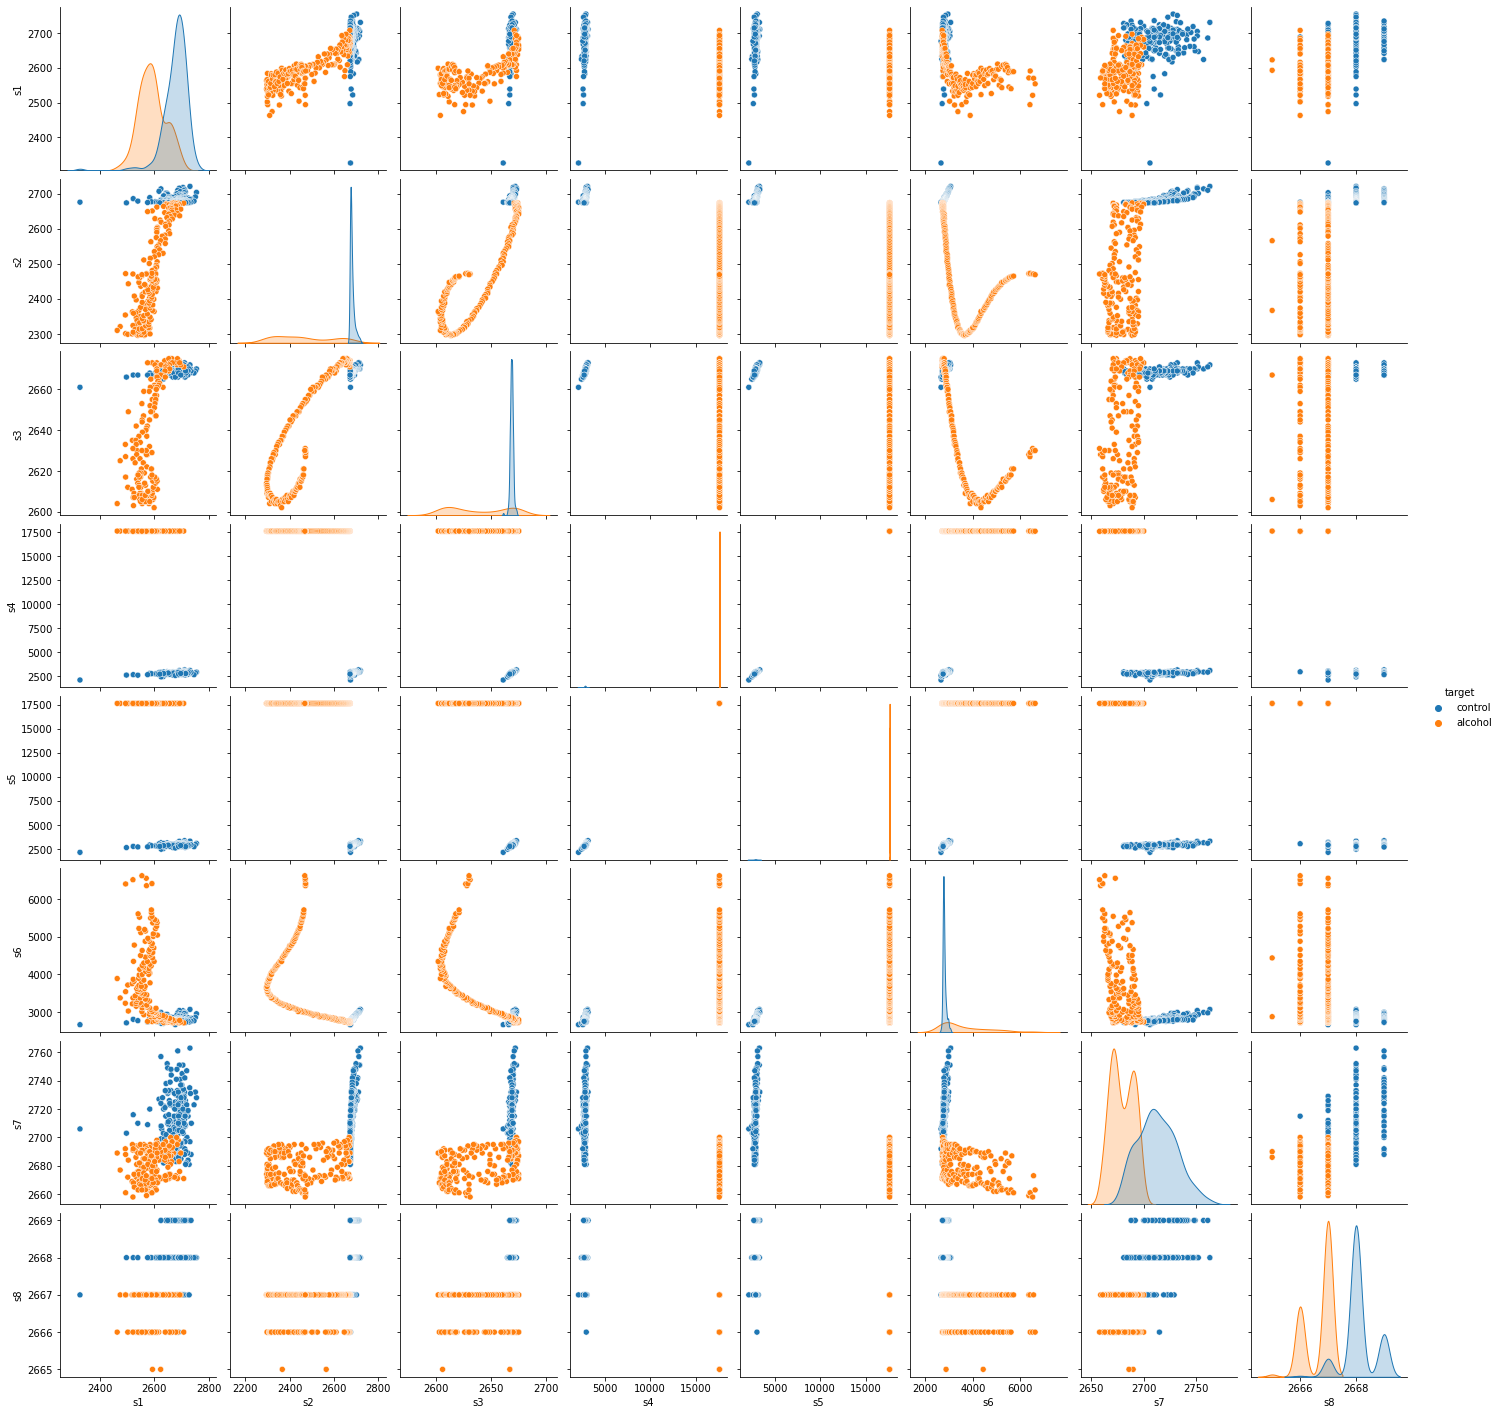

In [86]:
sns.pairplot(df, hue='target')

In [18]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [19]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
log_mod = LogisticRegression()

In [22]:
log_mod.fit(X_train, y_train)

LogisticRegression()

In [23]:
log_pred = log_mod.predict(X_test)

In [24]:
print(metrics.classification_report(y_test, log_pred))
print(metrics.confusion_matrix(y_test, log_pred))

              precision    recall  f1-score   support

     alcohol       1.00      1.00      1.00        60
     control       1.00      1.00      1.00        71

    accuracy                           1.00       131
   macro avg       1.00      1.00      1.00       131
weighted avg       1.00      1.00      1.00       131

[[60  0]
 [ 0 71]]


In [37]:
test = np.array([[2428,6,2607,17625,17624,17625,2779,2668]])
test

array([[ 2428,     6,  2607, 17625, 17624, 17625,  2779,  2668]])

In [38]:
log_mod.predict(test)

array(['alcohol'], dtype=object)

In [78]:
alcohol_2 = np.genfromtxt('data/alcohol2.csv', delimiter=',')

In [42]:
alcohol2_df = pd.DataFrame(alcohol_2, columns=col_val)
alcohol2_df

,s1,s2,s3,s4,s5,s6,s7,s8
0,2428.0,6.0,2607.0,17625.0,17624.0,17625.0,2779.0,2668.0
1,2446.0,6.0,2615.0,17625.0,17625.0,9728.0,2776.0,2668.0
2,2380.0,6.0,2623.0,17626.0,17625.0,6100.0,2774.0,2668.0
3,2397.0,6.0,2624.0,17626.0,17625.0,4709.0,2744.0,2667.0
4,2445.0,6.0,2629.0,17625.0,17625.0,4122.0,2758.0,2667.0
...,...,...,...,...,...,...,...,...
99,2208.0,6.0,1764.0,17621.0,17615.0,7798.0,2716.0,2667.0
100,2196.0,6.0,1690.0,17621.0,17615.0,8010.0,2709.0,2667.0
101,2173.0,6.0,1606.0,17620.0,17615.0,8205.0,2724.0,2668.0
102,2165.0,6.0,1514.0,17621.0,17615.0,8393.0,2721.0,2667.0


In [52]:
control2_df = control_df.loc[0:103]

In [59]:
alcohol2_df['target'] = 'alcohol'

In [62]:
df2 = pd.concat([control2_df, alcohol2_df])

In [63]:
df2

,s1,s2,s3,s4,s5,s6,s7,s8,target
0,2731.0,2721.0,2672.0,3109.0,3315.0,3067.0,2763.0,2668.0,control
1,2705.0,2718.0,2670.0,2941.0,3132.0,3032.0,2751.0,2668.0,control
2,2692.0,2716.0,2673.0,3106.0,3298.0,3038.0,2751.0,2668.0,control
3,2624.0,2714.0,2670.0,2941.0,3145.0,2988.0,2757.0,2669.0,control
4,2711.0,2712.0,2673.0,3173.0,3359.0,2989.0,2732.0,2669.0,control
...,...,...,...,...,...,...,...,...,...
99,2208.0,6.0,1764.0,17621.0,17615.0,7798.0,2716.0,2667.0,alcohol
100,2196.0,6.0,1690.0,17621.0,17615.0,8010.0,2709.0,2667.0,alcohol
101,2173.0,6.0,1606.0,17620.0,17615.0,8205.0,2724.0,2668.0,alcohol
102,2165.0,6.0,1514.0,17621.0,17615.0,8393.0,2721.0,2667.0,alcohol


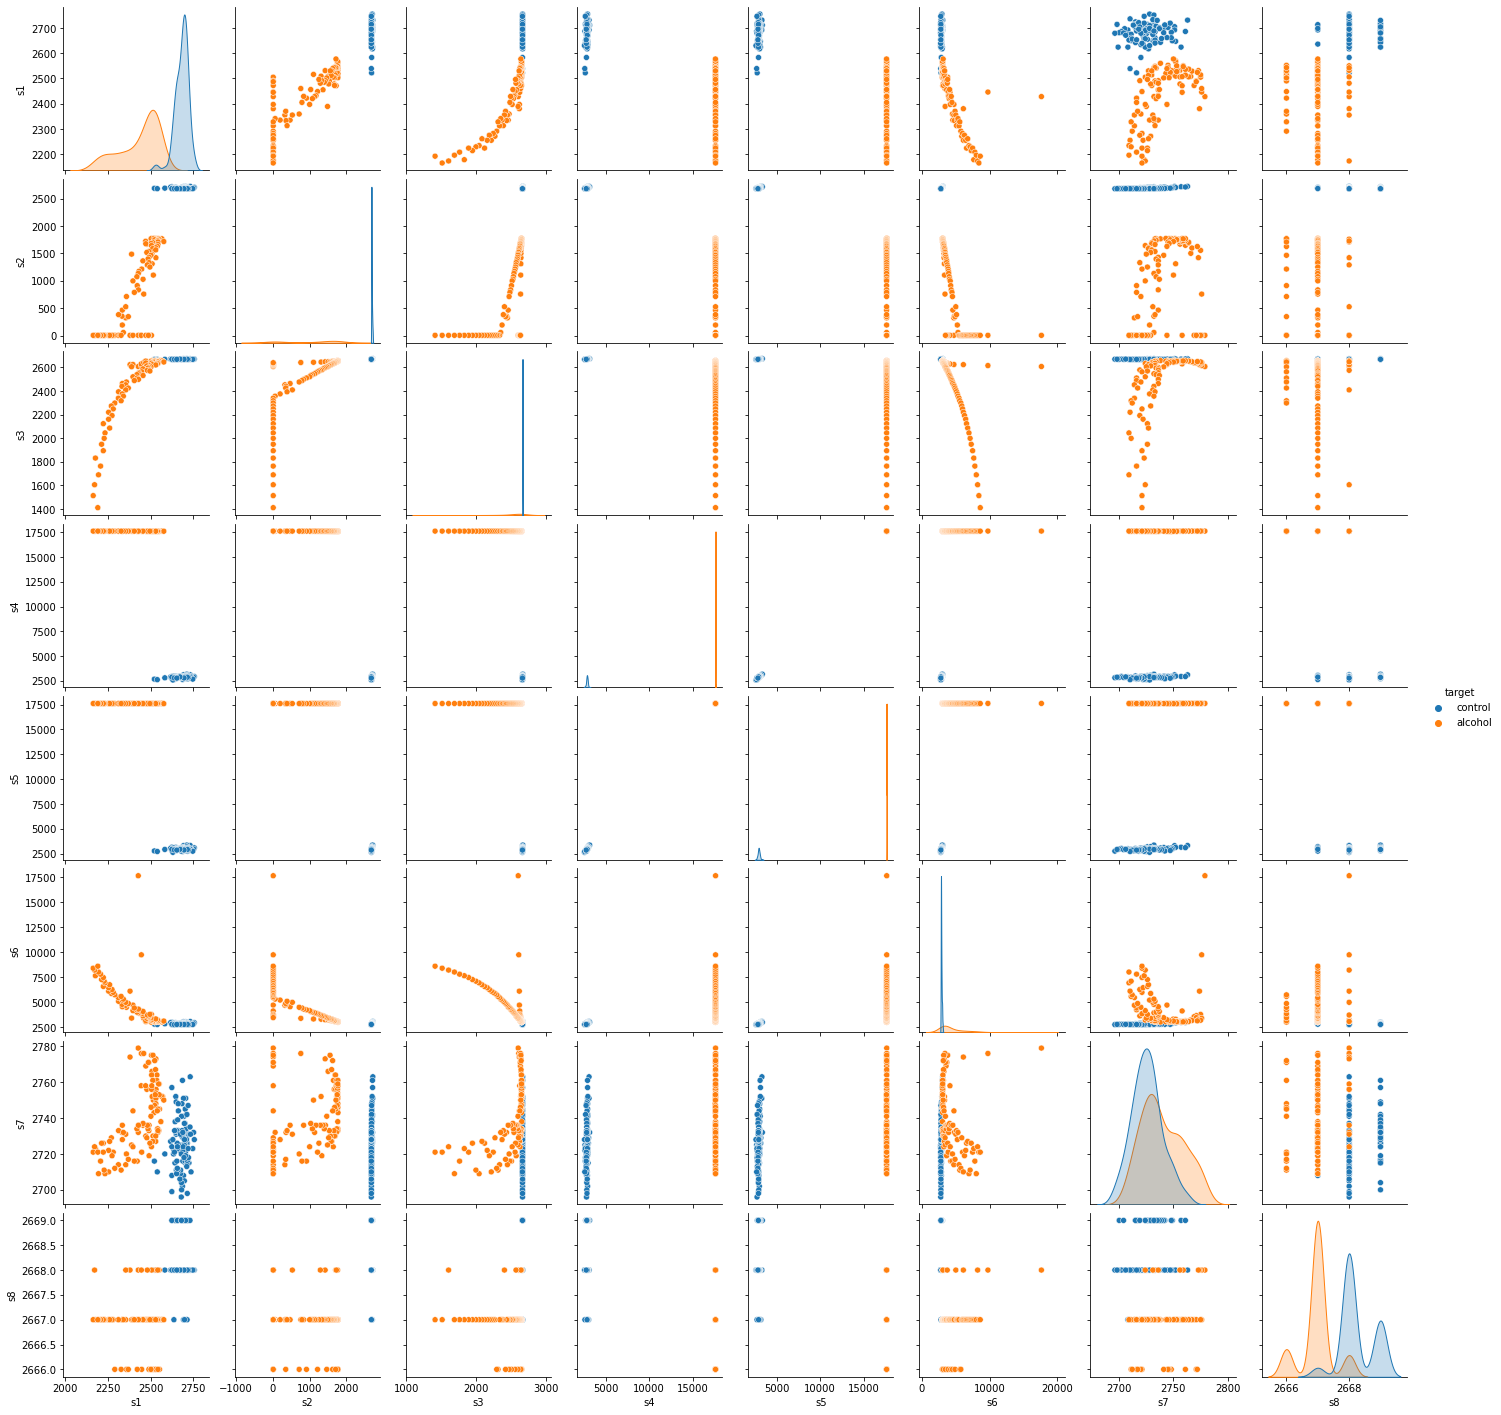

In [64]:
sns.pairplot(df2, hue='target')

In [65]:
log_mod2 = LogisticRegression()

In [67]:
X = df2.drop('target', axis=1)
y = df2['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [68]:
log_mod2.fit(X_train, y_train)

LogisticRegression()

In [69]:
pred = log_mod2.predict(X_test)

In [72]:
print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

     alcohol       1.00      1.00      1.00        35
     control       1.00      1.00      1.00        34

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69

[[35  0]
 [ 0 34]]


In [73]:
test = log_mod.predict(X)

In [75]:
print(metrics.classification_report(y, test))
print(metrics.confusion_matrix(y, test))

              precision    recall  f1-score   support

     alcohol       1.00      1.00      1.00       104
     control       1.00      1.00      1.00       104

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208

[[104   0]
 [  0 104]]


In [87]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
score = []
k_range = range(1, 40)
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    score.append(metrics.accuracy_score(y_test, pred))

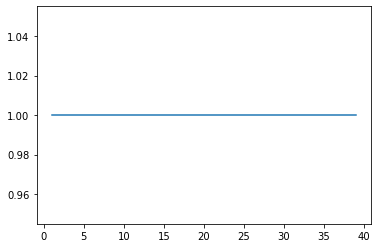

In [91]:
plt.plot(k_range, score)

In [92]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [93]:
print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

     alcohol       1.00      1.00      1.00        60
     control       1.00      1.00      1.00        71

    accuracy                           1.00       131
   macro avg       1.00      1.00      1.00       131
weighted avg       1.00      1.00      1.00       131

[[60  0]
 [ 0 71]]
